In [1]:
import cv2
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicCoding')

def read_img(path):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img, gray


def plot(img, bboxes, labels):
    img = img.copy()

    for bbox, label in zip(bboxes, labels):
        x, y, w, h = bbox
        img = cv2.rectangle(img, (x,y), (x+w, y+h), (0, 0, 255), 3)

    plt.figure(figsize=(18, 16))
    plt.imshow(img)

    for bbox, label in zip(bboxes, labels):
        x, y, w, h = bbox
        label = str(label)
        text_bbox = dict(boxstyle='round', alpha=0.2, facecolor='black')
        max_line = 7
        for i in range(len(label)//max_line):
            partition = (i+1)*max_line + i
            label = label[:partition] + '\n' + label[partition:]
        plt.text(x, y, label+f'\n({x, y},\n {w, h})', size=9, color='white', bbox=text_bbox, weight='semibold')
        # ret = plt.text(label, (x+w//2, y+h//2), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 1)
    plt.show()


def plot_without_label(img, bboxes):
    img = img.copy()

    for bbox in bboxes:
        x, y, w, h = bbox
        img = cv2.rectangle(img, (x,y), (x+w, y+h), (0, 0, 255), 3)

    plt.figure(figsize=(18, 16))
    plt.imshow(img)
    plt.show()


def plot_points(img, points, labels):
    img = img.copy()

    plt.figure(figsize=(18, 16))
    plt.imshow(img)
    x_points = [x for x, _ in points]
    y_points = [y for _, y in points]
    plt.scatter(x_points, y_points, s=100)
    
    for point, label in zip(points, labels):
        x, y = point
        text_bbox = dict(boxstyle='round', alpha=0.2, facecolor='black')
        max_line = 7
        for i in range(len(label)//max_line):
            partition = (i+1)*max_line + i
            label = label[:partition] + '\n' + label[partition:]
        plt.text(x, y, label, size=8, color='white', bbox=text_bbox, weight='semibold')
        # ret = plt.text(label, (x+w//2, y+h//2), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 1)
    plt.show()
    
    
def plot_pair(img1, img2, iou_bboxes):
    _img1 = img1.copy()
    _img2 = img2.copy()
    colors = [(0, 0, 255), (255, 0, 0), (0, 255, 0), (255, 255, 255), (255,255,0), (0,255,255),
         (128,0,0), (128,128,0), (0,128,0), (255,127,80), (34,139,34), (138,43,226), (255,182,193), (188,143,143), (119,136,153)]
    fig, axes = plt.subplots(1, 2, figsize=(25, 12))
    
    for (before, after), color in zip(iou_bboxes, colors):
        if before != None:
            x1, y1, w1, h1 = before
            cv2.rectangle(_img1, (x1, y1), (x1+w1, y1+h1), color, 6)
        if after != None:
            x2, y2, w2, h2 = after 
            cv2.rectangle(_img2, (x2, y2), (x2+w2, y2+h2), color, 6)

    axes[0].imshow(_img1)
    axes[1].imshow(_img2)
    plt.show()
    
    
def plot_slope(iou_bboxes):
   
    fig, axes = plt.subplots(1, 2, figsize=(25, 12))
    for before_bbox, after_bbox in iou_bboxes:
        if before_bbox == None or after_bbox == None:
            continue
        i = 0
        for img, bbox, bboxes in zip([before_img, after_img], [before_bbox, after_bbox], [before_bboxes, after_bboxes]):

            x_min, y_min, x_max, y_max, x_center, y_center = get_bbox_info(*bbox)

            min_left, min_right = get_side_bbox(bbox, bboxes)
            cv2.rectangle(img, min_left[:2], min_left[2:4], (255, 255, 255), 3)
            cv2.rectangle(img, min_right[:2], min_right[2:4], (255, 255, 255), 3)
            axes[i].imshow(img)

            left_x, left_y = min_left[-2:]
            right_x, right_y = min_right[-2:]
            left_slope =  -round((left_y - y_center) / (left_x - x_center), 2)
            right_slope =  -round((right_y - y_center) / (right_x - x_center), 2)


            #plot slope with line
            axes[i].plot([left_x, x_center], [left_y, y_center], lw=5)
            axes[i].plot([x_center, right_x], [y_center, right_y], lw=5)

            #plot slope value with text
            text_bbox = dict(boxstyle='round', alpha=0.2, facecolor='black')
            axes[i].text(left_x-150, left_y, f'left_slope:\n{left_slope}', size=15, color='white', bbox=text_bbox)
            axes[i].text(right_x , right_y, f'right_slope:\n{right_slope}', size=15, color='white', bbox=text_bbox)
            i += 1

    plt.show()

In [2]:
# from modules.Human_detect import Human_detect
from modules.changeDetector import detectChange
from modules.ramen_detect import Ramen
from modules.calcIou import CalIou
from modules.classification import Classifier
from modules.outDetection import get_bbox_info, get_side_bbox, get_slope, check_status


Fusing layers... 
Model summary: 733 layers, 140035432 parameters, 0 gradients, 208.3 GFLOPs


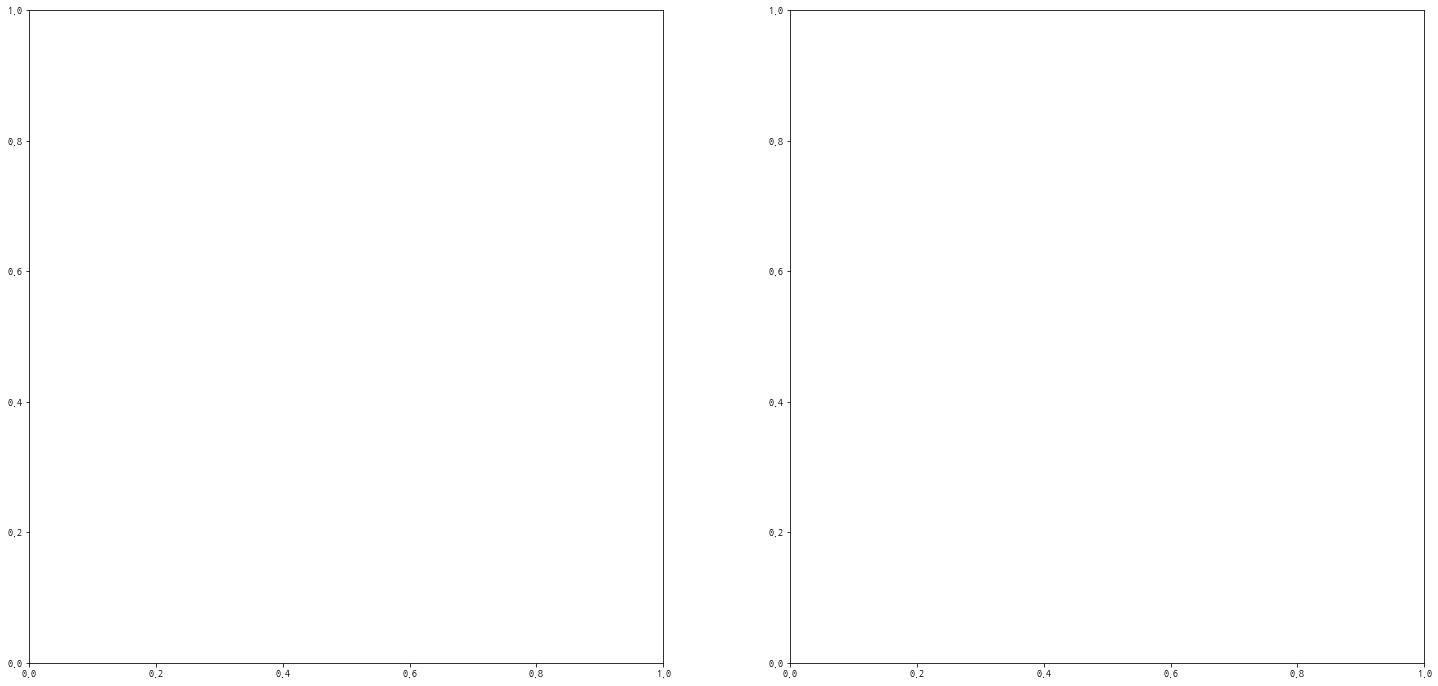

Fusing layers... 
Model summary: 733 layers, 140035432 parameters, 0 gradients, 208.3 GFLOPs


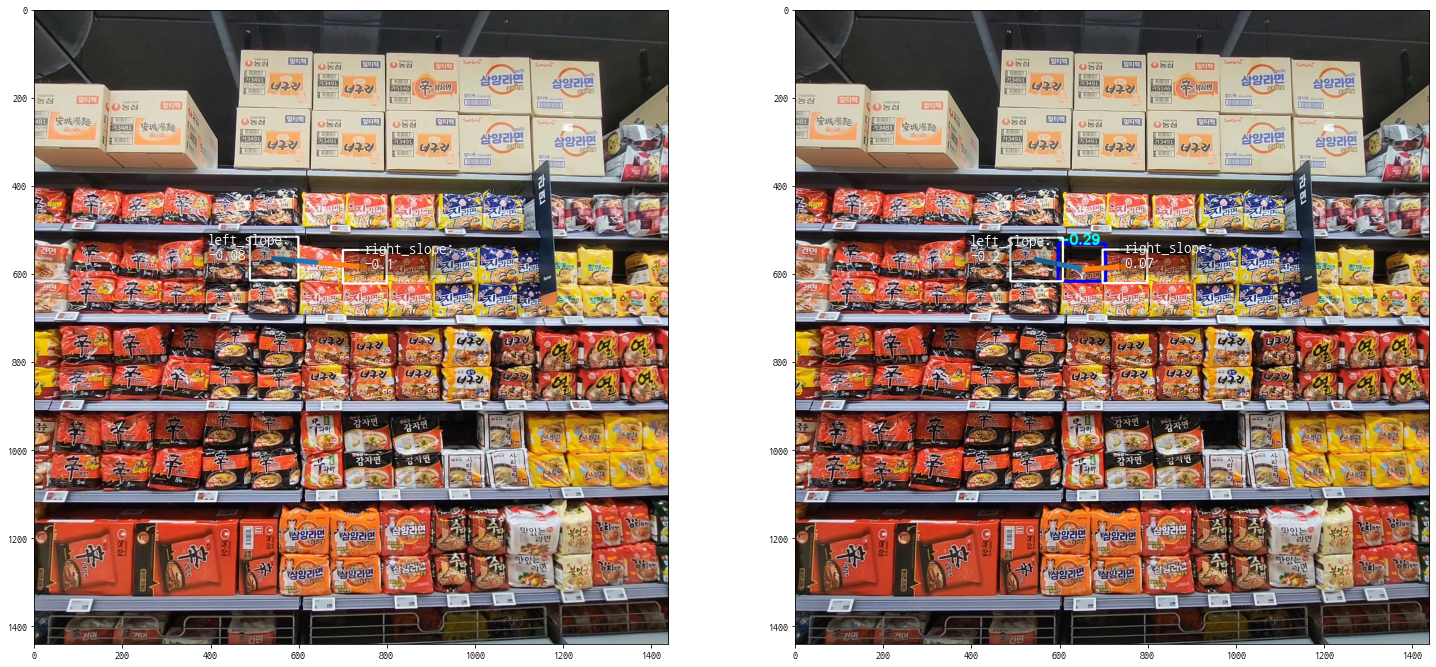

Fusing layers... 
Model summary: 733 layers, 140035432 parameters, 0 gradients, 208.3 GFLOPs


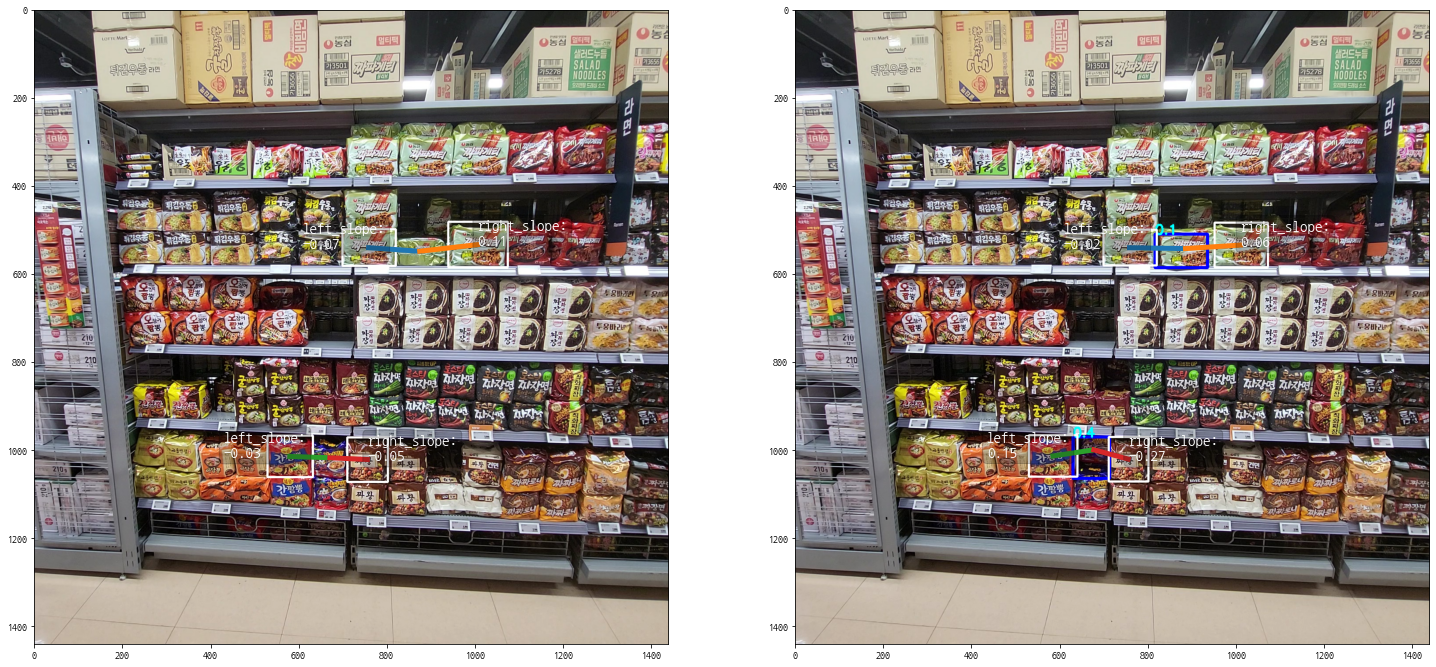

Fusing layers... 
Model summary: 733 layers, 140035432 parameters, 0 gradients, 208.3 GFLOPs


In [ ]:
%matplotlib inline

pairs = [
    ('창현1.jpg', '창현2.jpg'),
    
    ('진아1.jpg', '진아2.jpg'),
    ('KakaoTalk_20220528_151025237_11.jpg', 'KakaoTalk_20220528_151025237_12.jpg'),
    ('KakaoTalk_20220528_151025237_19.jpg', 'KakaoTalk_20220528_151025237_20.jpg'),
    ('KakaoTalk_20220528_151025237.jpg', 'KakaoTalk_20220528_151025237_01.jpg'),
    
    ('KakaoTalk_20220528_151025237_22.jpg', 'KakaoTalk_20220528_151025237_23.jpg'),
    ('KakaoTalk_20220528_151025237_19.jpg', 'KakaoTalk_20220528_151025237_22.jpg'),
    
    ('KakaoTalk_20220528_151025237_03.jpg', 'KakaoTalk_20220528_151025237_04.jpg'),
    ('KakaoTalk_20220528_151025237_04.jpg', 'KakaoTalk_20220528_151025237_05.jpg')
]


for pair in pairs:
   
    # 이미지 불러오기
    before_img = read_img(pair[0])[0]
    after_img = read_img(pair[1])[0]


    # 라면 object 감지
    ramenDetector = Ramen()
    before_bboxes = ramenDetector.ramen_detect(before_img) #--> 시각화 # plot_without_label(before_img, before_bboxes)
    after_bboxes = ramenDetector.ramen_detect(after_img) #--> 시각화 # plot_without_label(after_img, after_bboxes)

    
    # 변화된 bbox만 추출
    before_changed, before_scores, after_changed, after_scores = \
        detectChange(before_img, after_img, before_bboxes, after_bboxes, threshold=50) 
    # --> 시각화 # plot(before_img, before_changed, before_scores) 
    # --> 시각화 # plot(after_img, after_changed, after_scores)
    

    # before, after에서 같은 위치 박스 추출
    iou_bboxes = CalIou(before_changed, after_changed, threshold=0.4) #--> 시각화 # plot_pair(before_img, after_img, iou_bboxes)
    
    
    # 상품 상태(감소/증가) 확인 후 after image에 시각화
    for before_bbox, after_bbox in iou_bboxes:
        if before_bbox == None or after_bbox == None:
            continue
        status = check_status(before_bbox, after_bbox, before_bboxes, after_bboxes)
        x, y, w, h = before_bbox
        cv2.rectangle(after_img, (x, y), (x+w, y+h), (0, 0, 255), 5)
        cv2.putText(after_img, str(round(status,4)), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 4)
    
    
     
    plot_slope(iou_bboxes)
    
    # # 변화된 라면 object의 label을 추출
    # classifier = Classifier()
    # label_names1 = classifier.get_label(img1, iou_bboxes1) #--> 시각화 # plot(before_img, before_bboxes, label_names1)
    # label_names2 = classifier.get_label(img2, iou_bboxes2) #--> 시각화 # plot(after_img, after_bboxes, label_names2)
    # bbox2label = {(x, y, w, h) : label}
    

    # fig, axes = plt.subplots(1, 2, figsize=(22, 11))
    # axes[0].imshow(before_img)
    # axes[1].imshow(after_img)
    # plt.show()

# 결품찾기

In [4]:
# # 결품 bbox의 위치가 주어졌을 때,
# # before_img에서 양 옆 bbox와의 기울기와
# # after_img에서 양 옆 bbox와의 기울기 차이를 구함

# ### left bbox나 right bbox에 결품이 생겼을 때 기준을 어떻게 정할지 고려해야함

# def get_bbox_info(x, y, w, h):
#     x_center = x + w//2
#     y_center = y + h//2
#     x_min, y_min, x_max, y_max = x, y, x+w, y+h
#     return x_min, y_min, x_max, y_max, x_center, y_center


# def get_side_bbox(bbox, bboxes):
#     x_min, y_min, x_max, y_max, x_center, y_center = get_bbox_info(*bbox)

#     min_left_distance = 100000
#     min_right_distance = 100000

#     for bbox2 in bboxes:
#         bbox2_info = get_bbox_info(*bbox2)
#         x_min2, y_min2, x_max2, y_max2, x_center2, y_center2 = bbox2_info
#         cond1 = y_min < y_center2 < y_max  # 범위 체크 1
#         cond2 = y_min2 < y_center < y_max2 # 범위 체크 2
#         if cond1 and cond2:
#             distance = abs(x_center2 - x_center)

#             if x_center2 < x_center: #left
#                 if distance < min_left_distance:
#                     min_left_distance = distance
#                     min_left = bbox2_info

#             elif x_center2 > x_center: #right
#                 if distance < min_right_distance:
#                     min_right_distance = distance
#                     min_right = bbox2_info

#     return min_left, min_right


# def get_slope(bbox, bboxes):
#     x_center, y_center = get_bbox_info(*bbox)[-2:]
#     min_left, min_right = get_side_bbox(bbox, bboxes)
#     left_x, left_y = min_left[-2:]
#     right_x, right_y = min_right[-2:]
#     left_slope =  -round((left_y - y_center) / (left_x - x_center), 2)
#     right_slope =  -round((right_y - y_center) / (right_x - x_center), 2)
    
#     return left_slope, right_slope


# def check_status(before_bbox, after_bbox, before_bboxes, after_bboxes):
    
#     before_left_slope, before_right_slope = get_slope(before_bbox, before_bboxes)
#     after_left_slope, after_right_slope = get_slope(after_bbox, after_bboxes)
#     print(before_left_slope, before_right_slope, after_left_slope, after_right_slope)
#     d_left = (after_left_slope - before_left_slope) 
#     d_right = (after_right_slope - before_right_slope)
    
# #     d_left = 0 if -0.05 < d_left < 0.05 else d_left
# #     d_right = 0 if -0.05 < d_right < 0.05 else d_right
    
#     prod = d_left * d_right
#     return prod

# _after_img = img2.copy()
# for before_bbox, after_bbox in iou_bboxes:
#     if before_bbox == None or after_bbox == None:
#         continue
#     status = check_status(before_bbox, after_bbox, bbox_ramen1, bbox_ramen2)
#     x, y, w, h = before_bbox
#     cv2.rectangle(_after_img, (x, y), (x+w, y+h), (0, 0, 255), 5)
#     cv2.putText(_after_img, str(round(status,4)), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 4)
#     print(status)

# fig, axes = plt.subplots(1, 2, figsize=(24, 12))
# axes[0].imshow(img1)
# axes[1].imshow(_after_img)
# plt.show()

In [8]:




# before_bbox, after_bbox = (598, 530, 105, 89), (611, 560, 90, 58) # 진아1, 진아2
# before_bbox, after_bbox = (817, 506, 116, 80), (819, 490, 132, 99) # 진아_new11, 진아_new12 짜파
# before_bbox, after_bbox = (630, 969, 83, 96), (644, 966, 71, 65) # 진아_new11, 진아_new12 불닭짬뽕
before_bbox, after_bbox = (751, 578, 85, 60), (753, 543, 96, 96) # 진아_new19, 진아_new20 로제불닭
# before_bbox, after_bbox = (594, 544, 87, 94), (596, 545, 94, 92) # 진아_new19, 진아_new20 까르보불닭
# before_bbox, after_bbox = (542, 1009, 108, 96), (539, 1013, 114, 105)






x_center:  793
y_center:  608
min_left:  (505, 538, 599, 637, 552, 587)
min_right:  (836, 562, 926, 645, 881, 603)
left_slope: -0.09, right_slope: 0.06


x_center:  801
y_center:  591
min_left:  (505, 538, 601, 637, 553, 587)
min_right:  (842, 562, 927, 643, 884, 602)
left_slope: -0.02, right_slope: -0.13




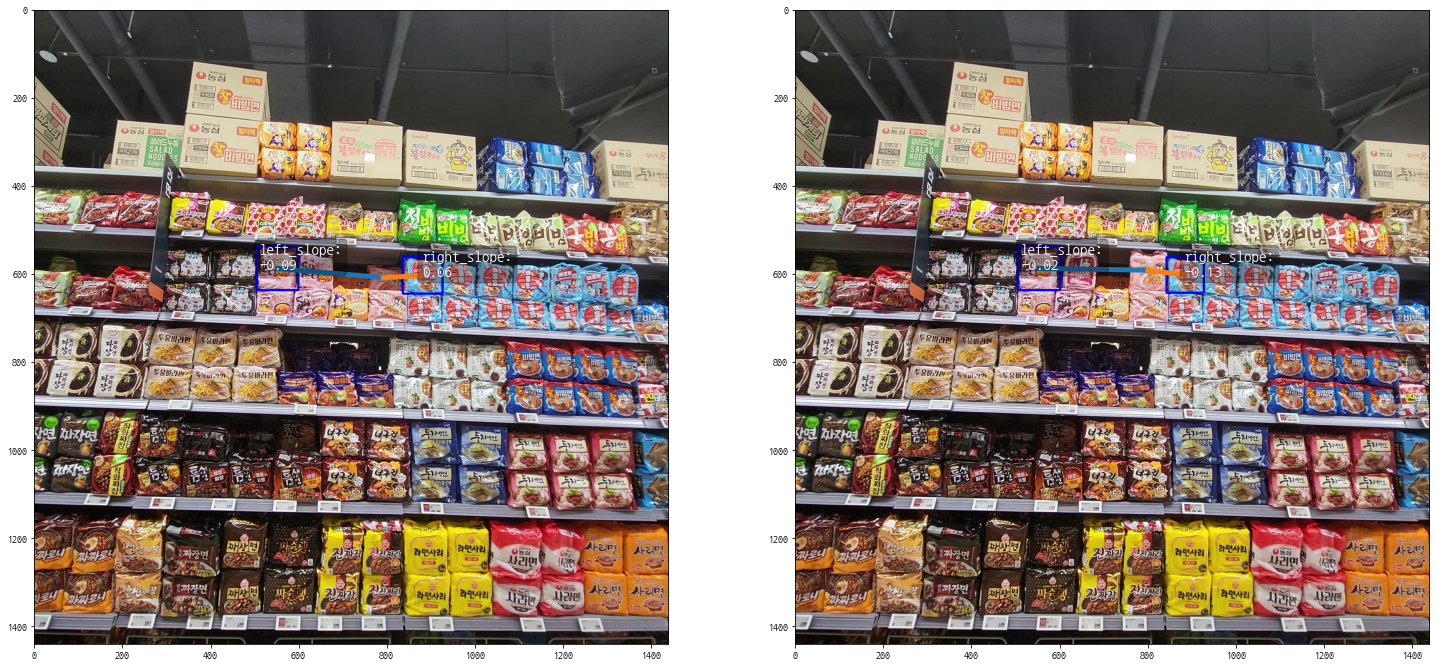

In [20]:




# before_bbox, after_bbox = (598, 530, 105, 89), (611, 560, 90, 58) # 진아1, 진아2
# before_bbox, after_bbox = (817, 506, 116, 80), (819, 490, 132, 99) # 진아_new11, 진아_new12 짜파
# before_bbox, after_bbox = (630, 969, 83, 96), (644, 966, 71, 65) # 진아_new11, 진아_new12 불닭짬뽕
before_bbox, after_bbox = (751, 578, 85, 60), (753, 543, 96, 96) # 진아_new19, 진아_new20 로제불닭
# before_bbox, after_bbox = (594, 544, 87, 94), (596, 545, 94, 92) # 진아_new19, 진아_new20 까르보불닭
# before_bbox, after_bbox = (542, 1009, 108, 96), (539, 1013, 114, 105)




i = 0
fig, axes = plt.subplots(1, 2, figsize=(25, 12))
for img, bbox, bboxes in zip([img1, img2], [before_bbox, after_bbox], [bbox_ramen1, bbox_ramen2]):
    img = img.copy()

    x_min, y_min, x_max, y_max, x_center, y_center = get_bbox_info(*bbox)
    print('x_center: ', x_center)
    print('y_center: ', y_center)
    min_left, min_right = get_side_bbox(bbox, bboxes)
    cv2.rectangle(img, min_left[:2], min_left[2:4], (0, 0, 255), 3)
    cv2.rectangle(img, min_right[:2], min_right[2:4], (0, 0, 255), 3)
    axes[i].imshow(img)

    print('min_left: ', min_left)
    print('min_right: ', min_right)
    left_x, left_y = min_left[-2:]
    right_x, right_y = min_right[-2:]
    left_slope =  -round((left_y - y_center) / (left_x - x_center), 2)
    right_slope =  -round((right_y - y_center) / (right_x - x_center), 2)
    print(f'left_slope: {left_slope}, right_slope: {right_slope}')
    
    
    #plot slope with line
    axes[i].plot([left_x, x_center], [left_y, y_center], lw=5)
    axes[i].plot([x_center, right_x], [y_center, right_y], lw=5)
    
    #plot slope value with text
    text_bbox = dict(boxstyle='round', alpha=0.3, facecolor='black')
    axes[i].text(left_x-40, left_y, f'left_slope:\n{left_slope}', size=15, color='white', bbox=text_bbox)
    axes[i].text(right_x , right_y, f'right_slope:\n{right_slope}', size=15, color='white', bbox=text_bbox)
    i += 1
    print()
    print()
plt.show()


# 같은 행 찾기

In [76]:
bboxes = []
for bbox in bbox_ramen1:
    x, y, w, h = bbox
    x_center = x + w//2
    y_center = y + h//2
    x_min, y_min, x_max, y_max = x, y, x+w, y+h
    bboxes.append((x_min, y_min, x_max, y_max, x_center, y_center))

In [77]:
groups = {}
bboxes = sorted(bboxes)
parent = [i for i in range(len(bboxes))]

for parent_idx in range(len(bboxes)):
    if parent[parent_idx] != parent_idx:
        continue
    
    x_min, y_min, x_max, y_max, x_center, y_center = bboxes[parent_idx] #첫번째 bbox
    next_idx = parent_idx # 다음 bbox index
    while next_idx < len(bboxes):
        min_distance = 100000
        min_idx = len(bboxes)
        for i in range(next_idx+1, len(bboxes)):
            if parent[i] != i: #이미 parent가 있으면 skip
                continue
            x_min2, y_min2, x_max2, y_max2, x_center2, y_center2 = bboxes[i] # 오른쪽에 있는 bbox info
            cond1 = y_min < y_center2 < y_max  # 범위 체크 1
            cond2 = y_min2 < y_center < y_max2 # 범위 체크 2
            if cond1 and cond2:  # 오른쪽 bbox의 y값이 범위 이내이면,
                distance = abs(x_center2 - x_center) # distance를 구하고,
                if distance < min_distance: # min distance를 가지는 idx를 뽑음
                    min_distance = distance
                    min_idx = i

        # 최소 distance를 가지는 index를 다음 기준 bbox로 정함
        if min_idx != len(bboxes): # 최소 거리를 가지는 bbox가 없는경우(행의 마지막 bbox인경우) 종료됨
            parent[min_idx] = parent_idx
            groups.setdefault(parent_idx, [parent_idx]).append(min_idx)
            x_min, y_min, x_max, y_max, x_center, y_center = bboxes[min_idx]
        next_idx = min_idx 

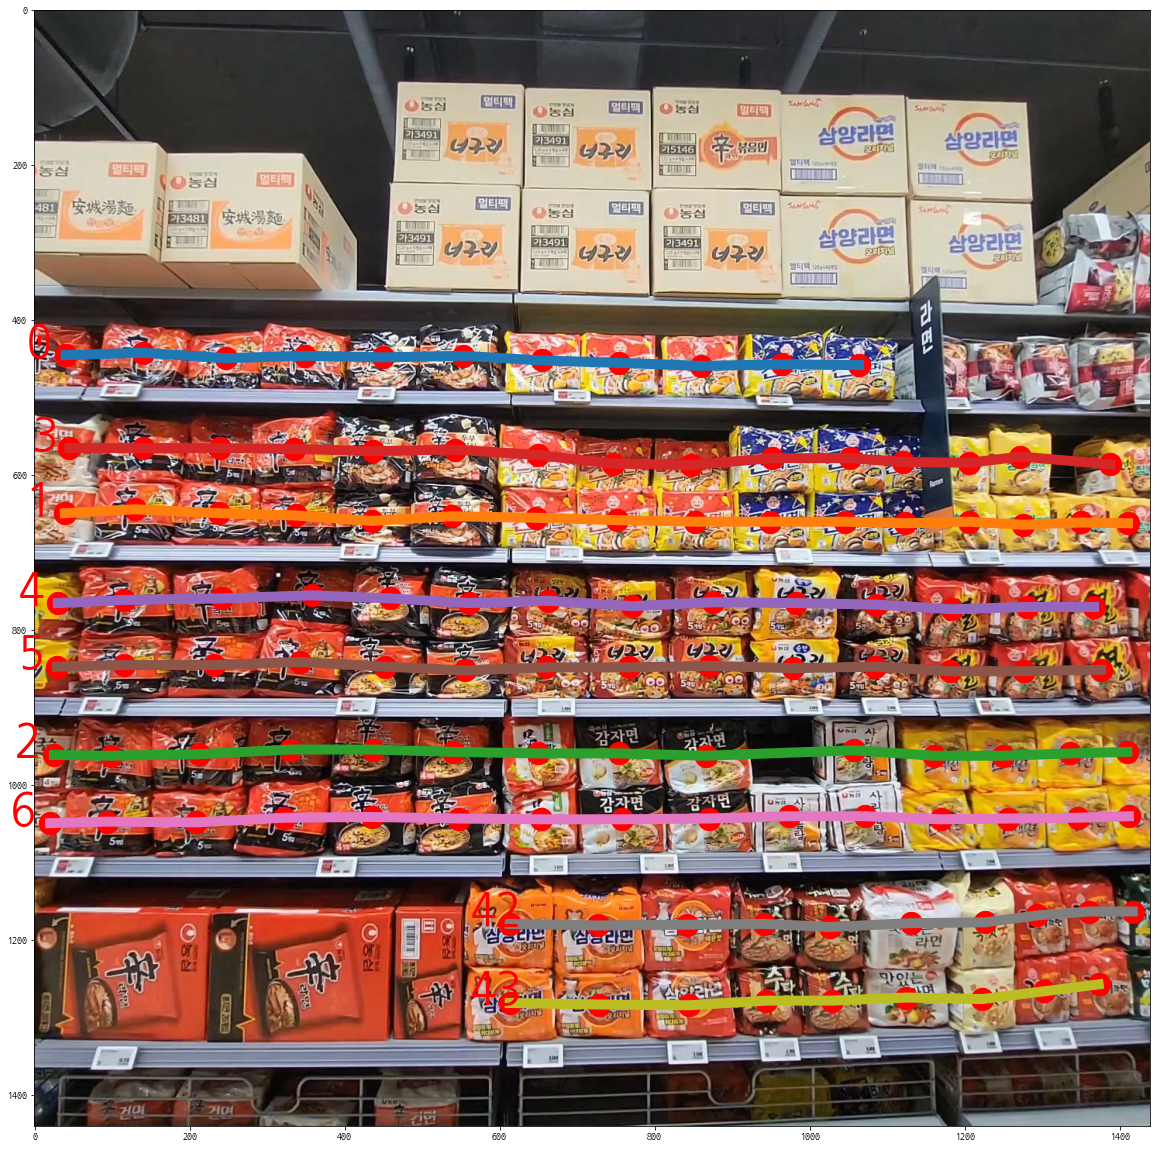

In [78]:
plt.figure(figsize=(20, 25))
plt.imshow(img1)
for idx, group in groups.items():
    xys_group = [(bboxes[_idx][-2], bboxes[_idx][-1]) for _idx in group]
    plt.text(xys_group[0][0]-50, xys_group[0][1], str(idx),  size=50, color='red')
    xs_group = [x for x, y in xys_group]
    ys_group = [y for x, y in xys_group]
    plt.plot(xs_group, ys_group, lw=10)
    
xs = [x for _, _, _, _, x, y in bboxes]
ys = [y for _, _, _, _, x, y in bboxes]
plt.scatter(xs, ys, color='red', s=500)

plt.show()